# Kmeans for k=3,4,5,6 and Vornoi diagrams

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sys
import csv
import random
import math
import matplotlib.pyplot as plt
import time
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.cluster import KMeans

from sklearn.datasets import make_blobs
n_samples=1000
n_features = 2

#from sklearn.datasets import make_moons
from scipy.spatial.distance import pdist, squareform
import sklearn.metrics.pairwise

filename = 'Dataset.csv'
raw_data = open(filename, 'rt')
reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
x = list(reader)
data = np.array(x).astype('float')
X = data

#Samples and featurees
n_samples = X.shape[0]  #gives 1000
n_features = X.shape[1] #gives 2

In [2]:
#from sklearn.datasets import make_moons
from scipy.spatial.distance import pdist, squareform
import sklearn.metrics.pairwise

filename = 'Dataset.csv'
raw_data = open(filename, 'rt')
reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
x = list(reader)
data = np.array(x).astype('float')
X = data

In [3]:
def centroid_initialization(X , n_clusters):
    centroids = np.zeros((n_clusters, n_features))
    #seed = [111, 1234, 0, 30000, 934524]
    seed = [11, 123, 0, 300, 934]
    
    #initial assignment (random)
    for i in range(n_clusters):
        #random.seed(seed[i])
        #centroid_current_cluster = X[np.random.choice(range(n_samples))]
        centroid_current_cluster = X[random.randint(1,1000)]
        centroids[i] = centroid_current_cluster

    return centroids

In [4]:
def cluster_assignment(X, centroids , n_clusters):
    current_clusters = [[] for i in range(n_clusters)]

    for index, data_point in enumerate(X):
        nearest_centroid = np.argmin(
            np.sqrt(np.sum((data_point - centroids) ** 2, axis=1))
        )
        current_clusters[nearest_centroid].append(index)

    return current_clusters

In [5]:
def update_centroids(X, current_clusters, n_clusters):
    centroids = np.zeros((n_clusters, n_features))
    for index, cluster in enumerate(current_clusters):
        new_centroid = np.mean(X[cluster], axis=0)
        centroids[index] = new_centroid

    return centroids

K-Means Converged
K-Means Converged
K-Means Converged
K-Means Converged


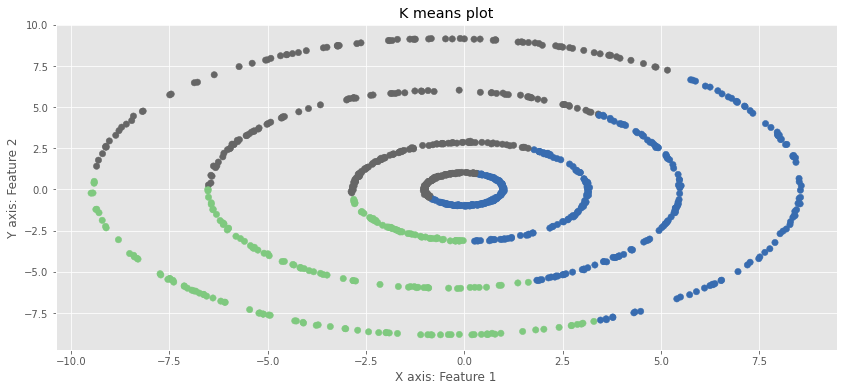

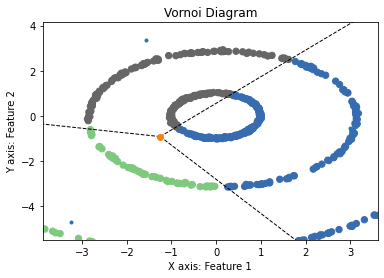

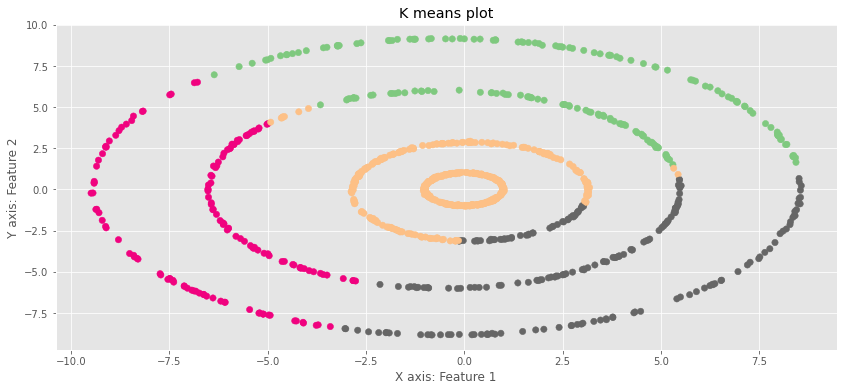

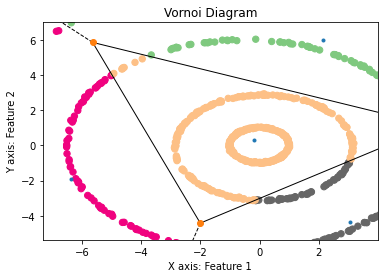

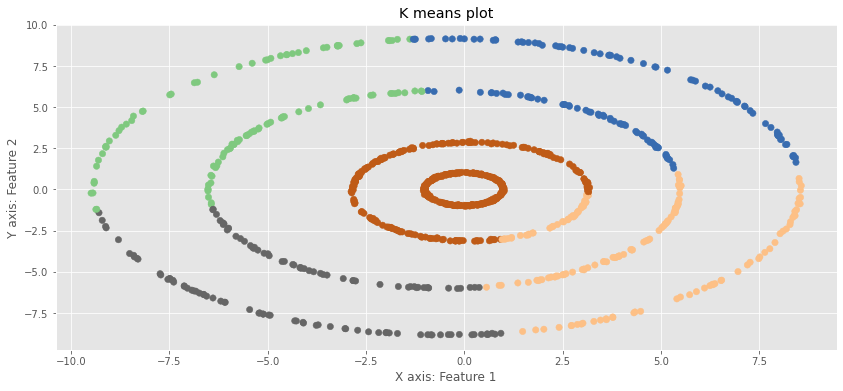

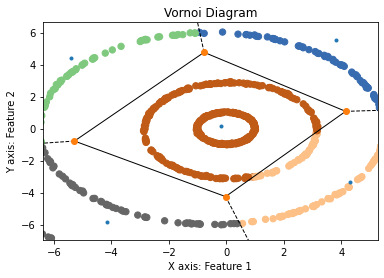

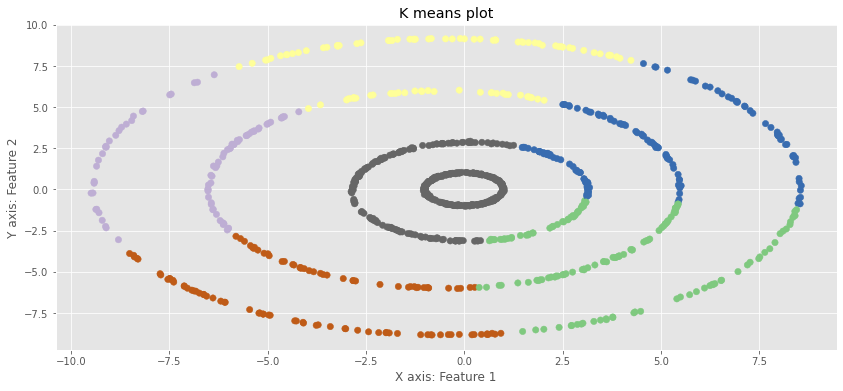

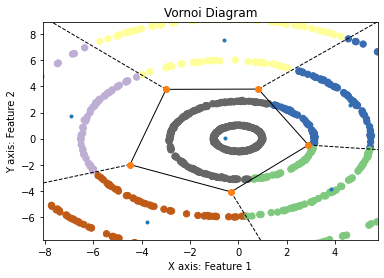

In [6]:
nclusters = [3,4,5,6]
for c in nclusters:
    centroids = centroid_initialization(X, c)
    current_clusters = cluster_assignment(X , centroids, c)
    update_centroids(X , current_clusters, c)
    
    n_iter = 1000
    centroids = centroid_initialization(X, c)
    for it in range(n_iter):
        clusters = cluster_assignment(X, centroids, c)
        previous_centroids = centroids.copy()
        centroids = update_centroids(X, clusters, c)
        diff = centroids - previous_centroids
                  
        if not diff.any():
            print("K-Means Converged")
            break
          
    #Assigning clusters_ids to all data points
    with plt.style.context(('ggplot')):
        plt.figure(figsize=(14, 6))
        plt.xlabel("X axis: Feature 1")
        plt.ylabel("Y axis: Feature 2")
        plt.title("K means plot")
        y_pred = np.zeros(n_samples)
        for cluster_id, cluster in enumerate(clusters):
            for index in cluster:
                y_pred[index] = cluster_id
        plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=40, cmap= 'Accent')
        
    vor = Voronoi(centroids)
    voronoi_plot_2d(vor)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=40, cmap= 'Accent')
    plt.title("Vornoi Diagram")
    plt.xlabel("X axis: Feature 1")
    plt.ylabel("Y axis: Feature 2")